In [1]:
import http.client
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [28]:

conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {ascending: Block_Date}\n      where: {Block: {Date: {since: \"2023-9-01\", till: \"2023-10-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Block {\n        Date\n      }\n      count\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload, headers)
res = conn.getresponse()
data = res.read()
response= json.loads(data.decode("utf-8"))
print(response)


{'data': {'EVM': {'BalanceUpdates': [{'Balance': '9', 'BalanceUpdate': {'Address': '0x07a7da9f241c4cdb3692a825f67fc12afed80669'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0x6c217413bf88ce3af4239f26763d3de46f278c8f'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0x3e82c80415b3ba10a1be7e91c9c35c067b6fa4cb'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0x8d8c1d6afb0ba954ffff1e4581f492058731fd22'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0xb3f5de1b30d0b206c0f67920ce40da0ed3352d41'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0x0945be11418b180ec8dfe0447a9be1c15fb1bead'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0xc8444d5c5189cb7642553954d62f016857ea7331'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0xf8a703f457699f5f0ef806af6e8b3123af0b49f7'}}, {'Balance': '9', 'BalanceUpdate': {'Address': '0x81ee9bcfeda58e019e34183accfb6bbe84099322'}}, {'Balance': '85', 'BalanceUpdate': {'Address': '0x9723cc792c32dca2744690f99103d095ea149e82'}}]}}}


In [29]:
data_table= response['data']['EVM']['BalanceUpdates']
dataframe = pd.json_normalize(data_table)
print(dataframe.head(5))

  Balance                       BalanceUpdate.Address
0       9  0x07a7da9f241c4cdb3692a825f67fc12afed80669
1       9  0x6c217413bf88ce3af4239f26763d3de46f278c8f
2       9  0x3e82c80415b3ba10a1be7e91c9c35c067b6fa4cb
3       9  0x8d8c1d6afb0ba954ffff1e4581f492058731fd22
4       9  0xb3f5de1b30d0b206c0f67920ce40da0ed3352d41


In [14]:
# print(dataframe.head(5))
for col in dataframe.columns :
    print(col)

Fee.EffectiveGasPrice
Trade.Amount
Trade.Currency.Name
Trade.Currency.ProtocolName
Trade.Currency.Symbol
Trade.Dex.ProtocolFamily
Trade.Dex.ProtocolName
Trade.Dex.ProtocolVersion
Trade.Fees
Trade.Price


In [19]:
print(dataframe['Trade.Fees'].head(3))

0    [{'Currency': {'Name': 'Ethereum', 'Symbol': '...
1    [{'Currency': {'Name': 'Ethereum', 'Symbol': '...
2    [{'Currency': {'Name': 'Ethereum', 'Symbol': '...
Name: Trade.Fees, dtype: object


In [25]:
data_slice = dataframe.drop(['Trade.Fees', 'Trade.Amount', 'Trade.Currency.ProtocolName', 'Trade.Currency.Symbol'], axis=1)
data_slice

,Fee.EffectiveGasPrice,Trade.Currency.Name,Trade.Dex.ProtocolFamily,Trade.Dex.ProtocolName,Trade.Dex.ProtocolVersion,Trade.Price
0,0.000000024674674971,Dreadfulz,Seaport,seaport_v1.4,1.4,129.827978
1,0.000000032149234809,Dreadfulz,X2Y2,x2y2,1.0,0.009565
2,0.000000031928200335,Dreadfulz,X2Y2,x2y2,1.0,0.009614
3,0.000000051656525472,Dreadfulz,X2Y2,x2y2,1.0,0.009468
4,0.000000049968236541,Dreadfulz,X2Y2,x2y2,1.0,0.009517
5,0.000000032310368490,Dreadfulz,Seaport,seaport_v1.4,1.4,140.646976
6,0.000000033166986276,Dreadfulz,Seaport,seaport_v1.4,1.4,128.218279
7,0.000000051127868249,Dreadfulz,X2Y2,x2y2,1.0,0.010018
8,0.000000049260884902,Dreadfulz,X2Y2,x2y2,1.0,0.009420
9,0.000000019695129875,Dreadfulz,Seaport,seaport_v1.4,1.4,124.843945


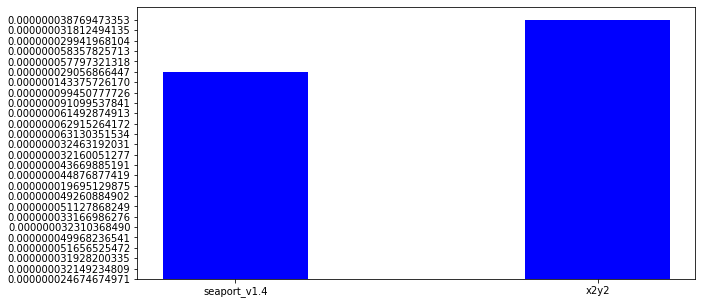

In [27]:
fig = plt.figure(figsize=(10,5))
plt.bar(data_slice['Trade.Dex.ProtocolName'], data_slice['Fee.EffectiveGasPrice'], color = 'blue', width=0.4)
plt.show()